## değişken ve türleri

**nicel değişken:** sayılarla ifade edilebilinen değişkenlerdir <br>
**nitel değişken:** sayısal olarak ifade edilemeyen, sembollerle ifade edilen değişkenlerdir <br>
**sürekli değişken:** sonsuz sayıda olan değişkenlerdir. örneğin 0 ve 1 arasındaki sonsuz sayıdaki rasyonel sayılar <br>
**süreksiz değişken:** belli bir sayıda, sınırlı sayıda değer alabilen değişkenlerdir. örneğin bir insanın 1 dakikada atladığı ip sayısı <br>

In [1]:
# uygulama
import pandas as pd

nitel = pd.Series(["a","b","c","d"], dtype="category")
print(nitel)

nicel = pd.Series([1,3,5,7,9])
print(nicel)

0    a
1    b
2    c
3    d
dtype: category
Categories (4, object): [a, b, c, d]
0    1
1    3
2    5
3    7
4    9
dtype: int64


## merkezi eğilim ölçüleri

**En temel merkezi eğilim ölçüleri:** average/mean, median, mod <br>
**En sık kul. dağılım ölçüleri:** varyans(variance), standart sapma(st. deviation), standart hata(st. error) <br>

In [2]:
import numpy as np

df = pd.DataFrame()

df["age"] = [28, 42, 27, 24, 35, 54, 35, 37]

rassal = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))

print(rassal)

[66.11736308 70.14089073 71.6947306  64.2239558  63.48861137 57.5796816
 61.96054626 63.5018062  75.51983589 59.63490564 59.58379741 63.02081606
 72.44596437 77.89112868 68.22998207 73.06851356 70.67545945 60.26007235
 78.91833565 65.99991278 87.39957558 68.96084032 65.81562893 64.88221549
 61.71937029 66.5225746  56.96644036 79.22669438 66.94539715 57.77903932
 70.47584201 66.3790751  66.27336082 81.13080037 69.33201715 67.98871712
 68.7155582  66.26480781 71.54707006 68.70707586 62.12564555 69.7335466
 70.14235223 84.24887669 61.20677451 64.08067938 76.90808391 70.26986004
 76.65192838 60.58133814 73.32065957 79.29047389 56.44758037 71.27572485
 71.76159308 77.314233   71.78543417 67.66615654 84.08788616 66.30345103
 64.54474453 66.34982105 72.90088817 64.03921093 76.71639935 85.24368481
 70.99109227 76.20788879 63.20791803 82.57100965 72.31887889 57.51901548
 62.04063248 59.26087224 85.77924151 80.26114196 67.817987   63.19304289
 74.38705005 63.95031667 66.7112384  66.01888045 58.1

In [3]:
# mean
print("Python mean for \"age\": ", sum(df["age"]) / len(df["age"]))
print("Python mean for \"rassal\": ", sum(rassal) / len(rassal))

print("\nNumpy mean for \"age\": ", np.mean(df["age"]))
print("Numpy mean for \"rassal\": ", np.mean(rassal))

Python mean for "age":  35.25
Python mean for "rassal":  66.93977569885537

Numpy mean for "age":  35.25
Numpy mean for "rassal":  66.93977569885541


In [4]:
# median
import statistics    # Python'un istatistik modülü

print(statistics.median(df["age"]))
print(np.median(df["age"]))

35.0
35.0


In [5]:
# mode:
# Mod değerler arasında en sık geçen değeri gösterir.
# Diğer bir değişle, mod analizi ile veride birden fazla kümelenme olup olmadığı tespit edilir.
# Eğer iki veya daha fazla değer aynı sayıda tekrar ederse çift mod oluşacaktır.
# Aşağıdaki kodu çift mod içeren bir veri ile çalıştırsaydınız hata alabilirdiniz.
# Aşağıdaki kod istisnalar oluşturmadan çift modlu verileri ele alabilecektir, fakat siz ilk modu alacaksınız.

print(statistics.mode(df["age"]))

35


In [6]:
(values, counts) = np.unique(df["age"], return_counts=True, return_index=False)

indx = np.argmax(counts)    # Returns the indices of the maximum values along an axis.

print("values :", values)
print("count :", counts)
print("indx :", indx)
print("values[indx] :", values[indx])    # The most frequent element.


values : [24 27 28 35 37 42 54]
count : [1 1 1 2 1 1 1]
indx : 3
values[indx] : 35


**Yanlılık (bias) hakkında bir not:** Örneklemden hesaplanan ortalama, medyan ve mod popülasyon hakkında tarafsız (yanlı olmayan) bir tahmin olarak düşünülür. Bir tahmin tarafsız ise, örnek popülasyonu en iyi şekilde temsil eder. Taraflı bir gözlem ise popülasyon değerinin ya üstünde ya da altında bir değere yaklaşım gösterecektir. Yanlılık kısaca şu şekilde ifade edilebilir:

***Yanlılık = Örneklem Ortalaması - Popülasyon Ortalaması***

Tarafsız tahmin kullanışlıdır, daha büyük bir grup hakkında genelleme yapabilmek için küçük bir grup üzerinde gözlem yapabilmemizi sağlar. Bu derste gösterdiğimiz uygulamalar aslında örneklem üzerinde yapılmış çalışmalar. Örneklem ve popülasyon üzerinde bu bölümün son dersinde duracağımız için bu küçük notu kısa kesiyoruz.

## dağılım ölçüleri

**En temel merkezi eğilim ölçüleri:** average/mean, median, mod <br>
**En sık kul. dağılım ölçüleri:** varyans(variance), standart sapma(st. deviation), standart hata(st. error) <br>


### variance
![variance](variance.jpg)
Varyans, her bir veri noktasının ortalamaya olan farkının karelerinin toplamının, gözlem sayısının bir eksiğine bölümü ile bulunur. <br>
Birçok insan ortalamayı bulup onun üzerinde çalışma yaparken, veri bilimciler genellikle varyans üzerinde çalışırlar. Çünkü veri bilimciler araştırma konusu değişkenin neden birbirinden farklı davrandığını anlamaya çalışırlar. Neden bu mağazanın kazanç marjı diğerlerinden çok yüksek? Neden bu ilacın yan etkileri diğer emsal ilaçlara göre çok daha az? Neden bazı müşteriler şirketin web sitesinde daha fazla zaman geçiriyorlar? gibi sorular aslında varyansla ilgilidir. Yüksek varyansa sahip bir değişken gözlemler hakkında farklılıkları ele verir, bu sayede veri bilimciler gelecek çıktıları anlamak için bunları kullanırlar.Burada μ popülasyon ortalamasını temsil etmektedir.

Varyansın hesaplanması ile ilgili iki gariplik var. Neden farkın karesi alınıyor ve neden n ‘e değilde (n-1)’e bölünüyor.

İlk soruya cevap olarak, ortalamaya göre sadece fakları alınsaydı toplamı sıfır olurdu çünkü yarısı negatif, yarısı pozitif olacaktı. Karesini alarak negatif değerleri kullanışlı hale getiriyoruz. Tabi ki mutlak değeri alarak hesaplayabilirdik, bu sayede negatif değerleri kullanabilirdik. Karesini almanın başka matematiksel faydaları var bunu sonra tartışacağız. Neden n-1 aldığımızın cevabı ise yanlılıkla (bias) alakalı olduğundan şimdilik tartışmasına girmiyoruz. _(sanırım Sample grup olunca n-1, tüm populasyon olunca n alıyorduk, ondan.)_

In [7]:
print("Numpy variance: ", np.var(df["age"], ddof=1))    # “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents the number of elements. By default ddof is zero.
print("Pandas variance: ", df["age"].var())    ## variance neyi ifade ediyor?

Numpy variance:  92.5
Pandas variance:  92.5


### standard deviation
![Standard Deviation](std.jpg)
Değişkenliği ölçmekte en çok kullanılan göstergelerden birisi varyansın karekökünün alınmasıdır, buna standart sapma adını veririz.

In [8]:
np.std(df["age"], ddof=1)    # popülasyon için ddof=0 idi, default değeri zaten

9.617692030835672

### standard error
![Standard Error](ste.jpg)
Verideki değişkenliğin tespitinde sıklıkla kullanılan diğer bir gösterge ise standart hatadır. Standart hata örneklem ortalamasının belirsizliğinin bir ölçüsüdür. Standart sapma bize varyans hakkında bilgi verirken, standart hata bize ortalama hakkında bilgi verir.

Anket sonuçları standart hata kullanımı için güzel bir örnektir. Genellikle hata marjı olarak bilinir. Örneğin bir anket sonucu %44 ‘ün X ‘i desteklediğini söyler ve %3 standart hata olabileceğini söyler. Diğer bir deyişle seçim bittiğinde sonuçlar %41 ile %47 arasında olabilir demektir. Standart hata ne kadar küçük olursa ortalamanın bize daha kesin ölçüldüğünü anlatır.

Standart hata, standart sapmanın gözlem sayısının kareköküne bölünmesiyle bulunur:

In [9]:
np.std(df["age"], ddof=1) / np.sqrt(len(df["age"]))

3.4003676271838605

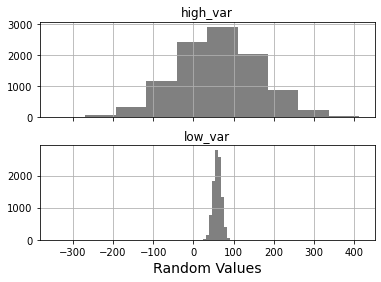

Max values :
 high_var    412.680945
low_var      99.239425
dtype: float64

Min values :
 high_var   -344.597227
low_var      24.116685
dtype: float64


In [10]:
import matplotlib.pyplot as plt

pop = pd.DataFrame()

# Ortalaması 60, standart sapması 10 ve 100 olan iki değişkenin oluşturulması
pop["high_var"] = np.random.normal(60, 100, 10000)
pop["low_var"] = np.random.normal(60, 10, 10000)

pop.hist(layout=(2,1), sharex=True, color="gray")    # sharex: share the x axis
plt.xlabel("Random Values", fontsize=14)
plt.show()

print("Max values :\n", pop.max())
print("\nMin values :\n", pop.min())

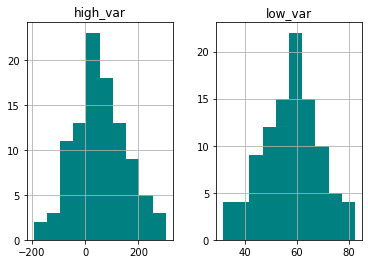

Mean values:
 high_var    57.908259
low_var     57.648223
dtype: float64

Standard Deviation:
 high_var    99.511053
low_var     10.996306
dtype: float64


In [11]:
# şimdi yukarıdaki popülasyondan 100'er örnek alacağız
sample = pd.DataFrame()
sample["high_var"] = np.random.choice(pop["high_var"], 100)   # 100 adet rastgele seçim
sample["low_var"] = np.random.choice(pop["low_var"], 100)

sample.hist(color="teal", layout=(1,2))
plt.show()

print("Mean values:\n", sample.mean())
print("\nStandard Deviation:\n", sample.std(ddof=1))

Örneklem popülasyondan rastgele seçildiği için, kodu her seferinde tekrar çalıştırabilir ve yeni örneklem üzerinde deneyebilirsiniz. Birkaç kere denemenizi tavsiye ederiz. Düşük değişkenliğe sahip örneklemin popülasyon ortalamasına ve standart sapmasına, yüksek değişkenliğe sahip örneklemden daha yakın olduğunu göreceksiniz.

Popülasyondan her örneklem seçildiğinde, dağılımın en uç noktalarından değerler (outlier) çekme ihtimalimiz var. En uç noktalardan değer almak örneklemin ortalamasını popülasyon ortalamasından uzaklaştırabilir. Bu yüzden yüksek değişkenlikli değişkenlerin düşüklere göre ortalamadan uzaklaşma potansiyelleri daha fazladır. Bu sorunu mümkün olduğunca örneklem sayısını artırarak giderebiliriz. Bunu ilerde detaylı bir şekilde tartışacağız.

## alıştırma

In [12]:
# pandas ve numpy'ı yukarıda import etmiştik.
data = pd.DataFrame()
data["Gender"] = ["male"]*100 + ["female"]*100
data["Weight"] = np.append(np.random.normal(69,8,100), np.random.normal(64,5,100))
data["Height"] = np.append(np.random.normal(195,25,100), np.random.normal(166,15,100))
data.info()    # verinin yapısı ile ilgili bilgi edinme

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  200 non-null    object 
 1   Weight  200 non-null    float64
 2   Height  200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [30]:
data.head(3)    # ilk "n" satır. boş bırakırsan default olarak n=5 alıyor.

,Gender,Weight,Height
0,male,68.827353,185.932870
1,male,71.597365,207.338065
2,male,67.939299,176.423618


In [32]:
data.head(-190)    # negatif değer: son "n" satır hariç hepsi

,Gender,Weight,Height
0,male,68.827353,185.932870
1,male,71.597365,207.338065
2,male,67.939299,176.423618
3,male,70.765775,217.117748
4,male,60.927788,196.415362
5,male,75.045004,184.268998
6,male,71.441212,171.517343
7,male,77.711843,255.066294
8,male,73.512429,197.456928
9,male,69.043735,204.658964


In [33]:
data.tail()    # son n satır. default n=5

,Gender,Weight,Height
195,female,67.665967,181.335032
196,female,62.473033,142.958875
197,female,58.066929,185.944309
198,female,64.538536,169.210008
199,female,57.711723,180.868215


In [39]:
data.tail(-189)    # ilk n satır hariç son kalanlar

,Gender,Weight,Height
189,female,57.007078,150.258029
190,female,64.508308,160.294277
191,female,62.299499,162.541536
192,female,70.244616,158.127348
193,female,73.706144,163.735447
194,female,67.491441,183.354130
195,female,67.665967,181.335032
196,female,62.473033,142.958875
197,female,58.066929,185.944309
198,female,64.538536,169.210008


In [58]:
print("Height mean: ", data.Height.mean())
print("Weight standard dev: ", data["Weight"].std())    # remember: it works for both dot and bracket notation

Height mean:  180.38583729499663
Weight standard dev:  6.591886161073934


In [64]:
# Ağırlık verilerinin içinde yer alan boşlukların (NaN), verilerin ortalaması ile doldurulması/değiştirilmesi
w_mean = data.Weight.mean()
data["Weight"].fillna(w_mean)
print(f"Ağırlık ortalaması: {w_mean:.2f}")

Ağırlık ortalaması: 66.47
